<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке:" data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке:</a></span></li><li><span><a href="#Проведем-предобработку-данных" data-toc-modified-id="Проведем-предобработку-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проведем предобработку данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией" data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество кросс-валидацией</a></span></li><li><span><a href="#Предсказания-на-тестовой" data-toc-modified-id="Предсказания-на-тестовой-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Предсказания на тестовой</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')
print(data_train.shape)
print(data_test.shape)
print(data_full.shape)

(14149, 86)
(5290, 52)
(19439, 86)


<div class="alert alert-info" role="alert">
  Взглянем на датасет data_train:
</div>

In [4]:
data_train.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant                      14117 non-null float64
primary_cleaner.i

### Проверка эффективности обогащения

<div class="alert alert-info" role="alert">
  Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между нашими расчётами и значением признака.
</div>

<div class="alert alert-info" role="alert">
Эффективность обогащения рассчитывается по формуле

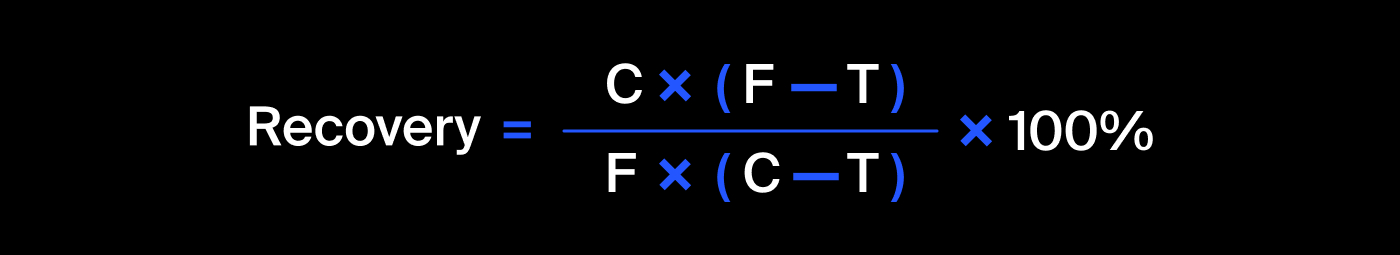

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.
</div>

In [7]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
data_train['recovery'] = (c * (f - t)) / (f * (c - t)) * 100
mae = mean_absolute_error(data_train['recovery'], data_train['rougher.output.recovery'])
mae

9.682896147825551e-15

In [8]:
data_train['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [9]:
data_train = data_train.drop('recovery', axis=1)

<div class="alert alert-info" role="alert">
  Вывод: исходя из полученного значения MAE, близкого к нулю, можно судить о том, что эффективность обогащения рассчитана правильно
</div>

### Проанализируем признаки, недоступные в тестовой выборке:


In [10]:
columns_in_train = data_train.columns
columns_in_test = data_test.columns
delta_columns = []
for column in columns_in_train:
    if column not in columns_in_test:
        delta_columns.append(column)
print(f'количество столбцов в train {len(columns_in_train)}')
print(f'количество столбцов в test {len(columns_in_test)}')
print(f'Столбцы, которых нет в test: {delta_columns}, количество = {len(delta_columns)}')

количество столбцов в train 86
количество столбцов в test 52
Столбцы, которых нет в test: ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher

In [11]:
data_train[delta_columns].dtypes

final.output.concentrate_ag                           float64
final.output.concentrate_pb                           float64
final.output.concentrate_sol                          float64
final.output.concentrate_au                           float64
final.output.recovery                                 float64
final.output.tail_ag                                  float64
final.output.tail_pb                                  float64
final.output.tail_sol                                 float64
final.output.tail_au                                  float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_pb                 float64
primary_cleaner.output.concentrate_sol                float64
primary_cleaner.output.concentrate_au                 float64
primary_cleaner.output.tail_ag                        float64
primary_cleaner.output.tail_pb                        float64
primary_cleaner.output.tail_sol                       float64
primary_

<div class="alert alert-info" role="alert">
  Вывод: проанализировав какие столбцы есть в train и отсутствуют в test, можно увидеть что это столбцы содержащие выходные характеристики ступеней технологического процесса. Поскольку эти значения можно получить лишь после самого процесса, то такие столбцы необходимо исключить из процесса обучения предсказыывающих моделей. 
</div>

### Проведем предобработку данных

<div class="alert alert-info" role="alert">
    Поскольку в датасете train есть столбцы содержащие информацию, недоступную на момент начала технологического процесса, необходимо предобработать данные
</div>

In [12]:
delta_columns.remove('rougher.output.recovery')
delta_columns.remove('final.output.recovery')
data_train = data_train.drop(delta_columns, axis=1)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
final.output.recovery                         14149 non-null float64
primary_cleaner.input.sulfate                 14129 non-null float64
primary_cleaner.input.depressant              14117 non-null float64
primary_cleaner.input.feed_size               14149 non-null float64
primary_cleaner.input.xanthate                14049 non-null float64
primary_cleaner.state.floatbank8_a_air        14145 non-null float64
primary_cleaner.state.floatbank8_a_level      14148 non-null float64
primary_cleaner.state.floatbank8_b_air        14145 non-null float64
primary_cleaner.state.floatbank8_b_level      14148 non-null float64
primary_cleaner.state.floatbank8_c_air        14147 non-null float64
primary_cleaner.state.floatbank8_c_level      14148 non-null float64
primary_cleaner.state.floatbank8_d_air        14146 non-null float64
primary_cleaner.state.floatbank8_d_l

<div class="alert alert-info" role="alert">
    Проверим данные на наличие пропусков
</div>

In [14]:
data_train.isna().sum()

final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate              29


In [15]:
data_train = data_train.ffill()

In [16]:
data_train.isna().sum()

final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

<div class="alert alert-info" role="alert">
    Проверим данные на наличие дубликатов
</div>

In [17]:
data_train.duplicated().sum()

0

<div class="alert alert-info" role="alert">
    Вывод: мы удалили столбцы, несущие информацию о целевой переменной и также очистили данные от пропусков.
</div>

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [18]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant                      19402 non-null float64
primary_cleaner.i

<div class="alert alert-info" role="alert">
Всего в технологическом процессе присутствуют 4 этапа:
    
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики
</div>


<div class="alert alert-info" role="alert">
Список столбцов с концентрацией на различных этапах
    
    
Этап input:
- rougher.input.feed_au 
- rougher.input.feed_ag  
- rougher.input.feed_pb
    
Этап rougher:
- rougher.output.concentrate_au
- rougher.output.concentrate_ag                    
- rougher.output.concentrate_pb                                             
 
Этап primary_cleaner:
- primary_cleaner.output.concentrate_au
- primary_cleaner.output.concentrate_ag               
- primary_cleaner.output.concentrate_pb                         
     
Этап final:
- final.output.concentrate_au 
- final.output.concentrate_ag                         
- final.output.concentrate_pb                                    

</div>

<div class="alert alert-info" role="alert">
    Изучим изменение концентрации золота:
</div>

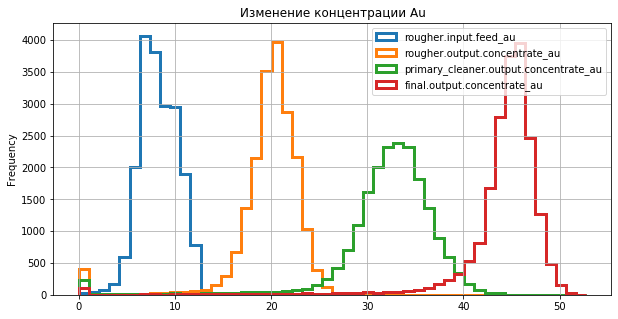

In [19]:
data_full.plot(kind='hist', y=['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'], histtype='step', bins=50, linewidth=3, grid=True, legend=True, figsize=(10,5))
plt.title('Изменение концентрации Au')
plt.show()

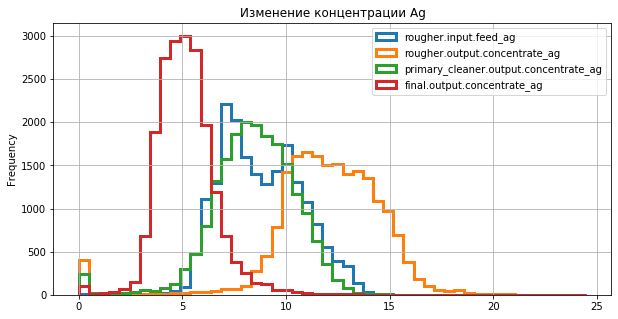

In [20]:
data_full.plot(kind='hist', y=['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'], histtype='step', bins=50, linewidth=3, grid=True, legend=True, figsize=(10,5))
plt.title('Изменение концентрации Ag')
plt.show()

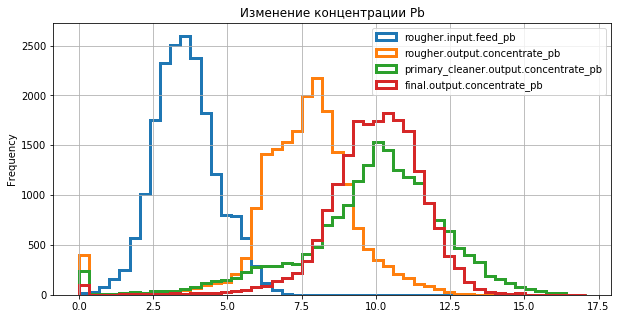

In [21]:
data_full.plot(kind='hist', y=['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'], histtype='step', bins=50, linewidth=3, grid=True, legend=True, figsize=(10,5))
plt.title('Изменение концентрации Pb')
plt.show()

<div class="alert alert-info" role="alert">
    
Вывод: исходя из составленных гистограмм распределения концентрации веществ для всех этапов можно сделать следующие заключения:
- концентрация Au растет с каждым этапом
- концентрация Ag убывает с каждым этапом
- концентрация Pb после первичной очистки резко увеличивается, а далее увеличивается уже совсем немного
</div>

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

<div class="alert alert-info" role="alert">
Размеры гранул сырья содержатся в колонке rougher.input.feed_size
</div>

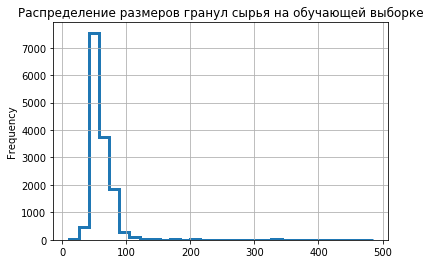

In [22]:
data_train.plot(kind='hist', y='rougher.input.feed_size', histtype='step', bins=30, linewidth=3, grid=True, legend=False)
plt.title('Распределение размеров гранул сырья на обучающей выборке')
plt.show()

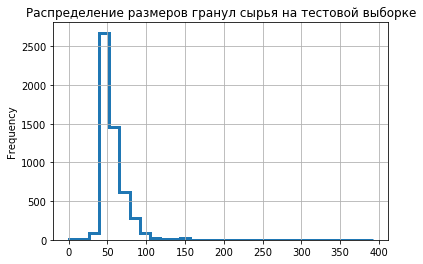

In [23]:
data_test.plot(kind='hist', y='rougher.input.feed_size', histtype='step', bins=30, linewidth=3, grid=True, legend=False)
plt.title('Распределение размеров гранул сырья на тестовой выборке')
plt.show()

<div class="alert alert-info" role="alert">
Вывод: распределение размеров гранул сырья в обучающей выборке аналогично распределению в тестовой. 
</div>

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

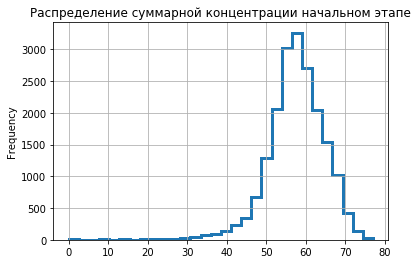

In [24]:
data_full['input_total_concentrate'] = (data_full['rougher.input.feed_au'] + 
                                        data_full['rougher.input.feed_ag'] + 
                                        data_full['rougher.input.feed_pb'] + 
                                        data_full['rougher.input.feed_sol'])
data_full.plot(kind='hist', y='input_total_concentrate', histtype='step', bins=30, linewidth=3, grid=True, legend=False)
plt.title('Распределение суммарной концентрации начальном этапе')
plt.show()

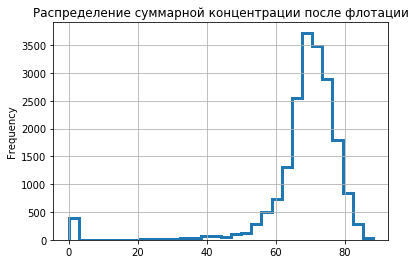

In [25]:
data_full['rougher_total_concentrate'] = (data_full['rougher.output.concentrate_au'] + 
                                          data_full['rougher.output.concentrate_ag'] +
                                          data_full['rougher.output.concentrate_pb'] +
                                          data_full['rougher.output.concentrate_sol'])
data_full.plot(kind='hist', y='rougher_total_concentrate', histtype='step', bins=30, linewidth=3, grid=True, legend=False)
plt.title('Распределение суммарной концентрации после флотации')
plt.show()

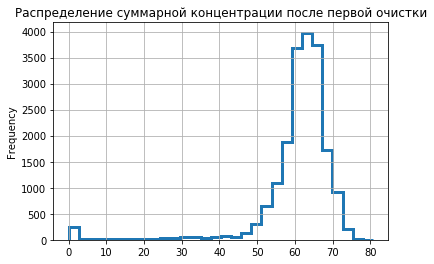

In [26]:
data_full['primary_cleaner_total_concentrate'] = (data_full['primary_cleaner.output.concentrate_au'] + 
                                                  data_full['primary_cleaner.output.concentrate_ag'] +
                                                  data_full['primary_cleaner.output.concentrate_pb'] +
                                                  data_full['primary_cleaner.output.concentrate_sol'])

data_full.plot(kind='hist', y='primary_cleaner_total_concentrate', histtype='step', bins=30, linewidth=3, grid=True, legend=False)
plt.title('Распределение суммарной концентрации после первой очистки')
plt.show()

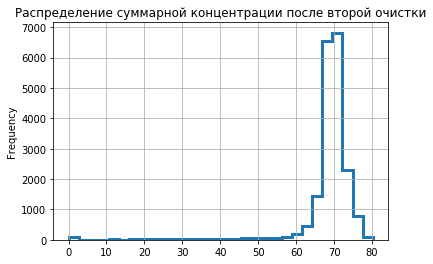

In [27]:
data_full['secondary_cleaner_total_concentrate'] = (data_full['final.output.concentrate_au'] +
                                                    data_full['final.output.concentrate_ag'] +
                                                    data_full['final.output.concentrate_pb'] +
                                                    data_full['final.output.concentrate_sol'])

data_full.plot(kind='hist', y='secondary_cleaner_total_concentrate', histtype='step', bins=30, linewidth=3, grid=True, legend=False)
plt.title('Распределение суммарной концентрации после второй очистки')
plt.show()

<div class="alert alert-info" role="alert">
Вывод: проанализировав графики можно заметить, что присутствуют всплески в области нуля. Поскольку концентрация всех веществ одновременно не может быть нулевой, можно заключить о том, что  всплески это выбросы в данных. Необходимо удалить строки, в которых сумма концентрации нулевая. Удалять данные будем в тренировочном наборе.
</div>

<div class="alert alert-info" role="alert">
Найдем индексы элементов, у которых сумма концентраций на каком-то из этапов равна 0
</div>

In [28]:
indexes = data_full[((data_full['input_total_concentrate'] == 0) | 
                     (data_full['rougher_total_concentrate'] == 0) |
                     (data_full['primary_cleaner_total_concentrate'] == 0) |
                     (data_full['secondary_cleaner_total_concentrate'] == 0)
                    )].index
print(len(indexes))
print(data_train.shape)
print(data_test.shape)

591
(14149, 54)
(5290, 52)


<div class="alert alert-info" role="alert">
Удалим элементы с нулевой суммарной концентрацией из train и test:
</div>

In [29]:
data_train = data_train.drop(axis=0, index=list(indexes), errors='ignore')
print(data_train.shape)

data_test = data_test.drop(axis=0, index=list(indexes), errors='ignore')
print(data_test.shape)

(13725, 54)
(5123, 52)


<div class="alert alert-info" role="alert">
Вывод: Данные для обучения модели были очищены и теперь можно перейти к моделированию.
</div>

## Модель

### Напишем функцию для вычисления итоговой sMAPE

<div class="alert alert-info" role="alert">
    
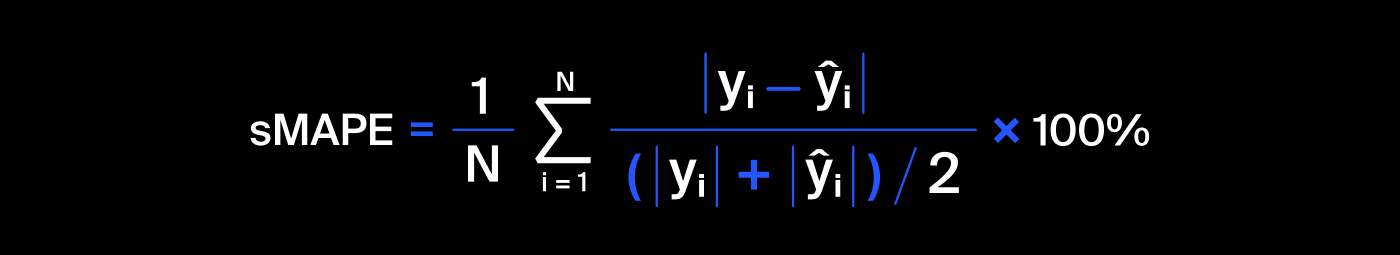
</div>

In [32]:
def smape(target, predictions):
    target = np.array(target)
    predictions = np.array(predictions)
    n = len(target)
    summa = 0
    for i in range(n):
        summa += (abs(target[i] - predictions[i])) / ((abs(target[i]) + abs(predictions[i])) / 2) 
    result = (1 / n) * summa * 100
    return result

In [33]:
my_smape = make_scorer(score_func=smape, greater_is_better=False)

<div class="alert alert-info" role="alert">
    
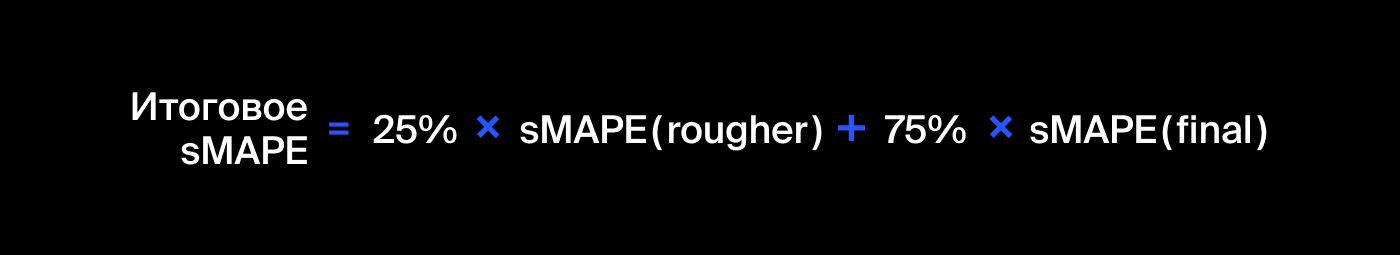
</div>


In [34]:
def result_smape(smape_rougher, smape_final):
    result = 0.25 * smape_rougher + 0.75 * smape_final
    return result

### Обучим разные модели и оценим их качество кросс-валидацией

<div class="alert alert-info" role="alert">
    Разделим датасет train на features и target
</div>

In [35]:
features = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_1 = data_train['rougher.output.recovery']
target_2 = data_train['final.output.recovery']

<div class="alert alert-info" role="alert">
Смоделируем линейную регрессию для этой задачи
</div>

In [36]:
model_1 = LinearRegression()
scores_1 = cross_val_score(model_1, features, target_1, cv=5, scoring=my_smape) 
smape_rougher = pd.Series(scores_1).mean()
print('Средняя оценка качества модели rougher.output.recover:', smape_rougher)

model_2 = LinearRegression()
scores_2 = cross_val_score(model_2, features, target_2, cv=5, scoring=my_smape) 
smape_final = pd.Series(scores_2).mean()
print('Средняя оценка качества модели final.output.recovery:', smape_final)

print('Итоговое sMAPE:', result_smape(smape_rougher, smape_final))

Средняя оценка качества модели rougher.output.recover: -7.26569604756598
Средняя оценка качества модели final.output.recovery: -10.950532500993159
Итоговое sMAPE: -10.029323387636364


<div class="alert alert-info" role="alert">
Смоделируем решающее дерево для этой задачи
</div>

In [37]:
model_1 = DecisionTreeRegressor(random_state=27)
scores_1 = cross_val_score(model_1, features, target_1, cv=5, scoring=my_smape) 
smape_rougher = pd.Series(scores_1).mean()
print('Средняя оценка качества модели rougher.output.recover:', smape_rougher)

model_2 = DecisionTreeRegressor(random_state=27)
scores_2 = cross_val_score(model_2, features, target_2, cv=5, scoring=my_smape) 
smape_final = pd.Series(scores_2).mean()
print('Средняя оценка качества модели final.output.recovery:', smape_final)

print('Итоговое sMAPE:', result_smape(smape_rougher, smape_final))

Средняя оценка качества модели rougher.output.recover: -13.467548375490589
Средняя оценка качества модели final.output.recovery: -14.641635517774517
Итоговое sMAPE: -14.348113732203535


<div class="alert alert-info" role="alert">
Смоделируем случайный лес для этой задачи
</div>

In [38]:
model_1 = RandomForestRegressor(random_state=27)
scores_1 = cross_val_score(model_1, features, target_1, cv=5, scoring=my_smape) 
smape_rougher = pd.Series(scores_1).mean()
print('Средняя оценка качества модели rougher.output.recover:', smape_rougher)

model_2 = RandomForestRegressor(random_state=27)
scores_2 = cross_val_score(model_2, features, target_2, cv=5, scoring=my_smape) 
smape_final = pd.Series(scores_2).mean()
print('Средняя оценка качества модели final.output.recovery:', smape_final)

print('Итоговое sMAPE:', result_smape(smape_rougher, smape_final))

Средняя оценка качества модели rougher.output.recover: -7.662965095364891
Средняя оценка качества модели final.output.recovery: -10.200564842625711
Итоговое sMAPE: -9.566164905810506


<div class="alert alert-info" role="alert">
Вывод: лучше всего с задачей справляется случайный лес, поскольку оно имеет наибольший sMAPE. Используем теперь для него GridSearchCV, чтобы подобрать оптимальные параметры.
</div>

In [48]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,7, 1)}

model_1 = RandomForestRegressor(random_state=27)
grid_1 = GridSearchCV(model_1, parametrs, cv=5, scoring=my_smape)
grid_1.fit(features, target_1)
print(grid_1.best_params_)

{'max_depth': 4, 'n_estimators': 40}


In [49]:
smape_rougher = grid_1.best_score_
print('Средняя оценка качества модели rougher.output.recovery:', smape_rougher)

Средняя оценка качества модели rougher.output.recovery: -6.633851312635171


In [50]:
model_2 = RandomForestRegressor(random_state=27)
grid_2 = GridSearchCV(model_2, parametrs, cv=5, scoring=my_smape)
grid_2.fit(features, target_2)
print(grid_2.best_params_)

{'max_depth': 4, 'n_estimators': 20}


In [51]:
smape_final = grid_2.best_score_
print('Средняя оценка качества модели final.output.recovery:', smape_final)

Средняя оценка качества модели final.output.recovery: -9.0161994102106


In [52]:
print('Итоговое sMAPE:', result_smape(smape_rougher, smape_final))

Итоговое sMAPE: -8.420612385816742


### Предсказания на тестовой

<div class="alert alert-info" role="alert">
Используем теперь эту модель для предсказаний на тестовой выборке:
</div>

In [53]:
data_test.shape

(5123, 52)

<div class="alert alert-info" role="alert">
В тестовых данных отсутствуют 2 целевых столбца, достанем их по индексам из data_full
</div>

In [54]:
indexes = list(data_test.index)
columns = list(data_train.columns)
new_data_test = data_full.loc[indexes, columns]
new_data_test.shape

(5123, 54)

In [55]:
new_data_test.isna().sum()

final.output.recovery                          0
primary_cleaner.input.sulfate                  1
primary_cleaner.input.depressant               2
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 1
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        20
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              4
rougher.input.floatb

In [56]:
new_data_test = new_data_test.ffill()

In [57]:
features_test = new_data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_1_test = new_data_test['rougher.output.recovery']
target_2_test = new_data_test['final.output.recovery']

In [58]:
model_1 = RandomForestRegressor(random_state=27, max_depth=4, n_estimators=40)
model_1.fit(features, target_1)
predictions_1 = model_1.predict(features_test)
smape_rougher = smape(target_1_test, predictions_1)
print('sMAPE rougher:', smape_rougher)

model_2 = RandomForestRegressor(random_state=27, max_depth=4, n_estimators=20)
model_2.fit(features, target_2)
predictions_2 = model_2.predict(features_test)
smape_final = smape(target_2_test, predictions_2)
print('sMAPE final:', smape_final)

print('Итоговое sMAPE:', result_smape(smape_rougher, smape_final))

sMAPE rougher: 4.735797948772284
sMAPE final: 7.938608389215171
Итоговое sMAPE: 7.137905779104449


In [60]:
model_dummy_1 = DummyRegressor(strategy="mean")
model_dummy_1.fit(features, target_1)
predictions_1 = model_dummy_1.predict(features_test)
smape_rougher = smape(target_1_test, predictions_1)
print('sMAPE rougher:', smape_rougher)

model_dummy_2 = DummyRegressor(strategy="mean")
model_dummy_2.fit(features, target_2)
predictions_2 = model_dummy_2.predict(features_test)
smape_final = smape(target_2_test, predictions_2)
print('sMAPE final:', smape_final)

print('Итоговое sMAPE:', result_smape(smape_rougher, smape_final))

sMAPE rougher: 5.3647809520682115
sMAPE final: 8.582525522731482
Итоговое sMAPE: 7.778089380065665


<div class="alert alert-info" role="alert">
Поскольку наша модель лучше чем константная, можно считать ее адекватной.
</div>

<div class="alert alert-info" role="alert">
    <b>Итоговый вывод:</b> 
    
В данном проекте нам необходимо было провести исследовательский анализ и спрогнозировать сразу 2 величины. 

- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.
    
Для этого мы предобработали данные, изучили и устранили аномалии.
Далее создали функцию для нахождения sMAPE и применяя кросс-валидацию определили какая из моделей дает на наилучший результат. Лучше всех отработал случайный лес.

Следующим этапом мы применили GridSearchCV для подбора наилучших параметров случайного леса и далее протестировали наилучший случайный лес на тестовых данных. 

На тестовой выборке:
- sMAPE rougher: 4.735797948772284
- sMAPE final: 7.938608389215171
- Итоговое sMAPE: 7.137905779104449
    
</div>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке